# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import numpy as np
import pandas as pd

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv('../data/states_edu.csv')
df.shape

(1715, 25)

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [3]:
## Rename columns and fill in missing enrollment estimates
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

df["ENROLL_ALL_EST"] = df["ENROLL_ALL_EST"].fillna(df["ENROLL_ALL"])

#drop math 8 scores which are NaN
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: Grade 8 Math

How many years of data are logged in our dataset?

There are 602 years logged for 8th grade math

In [4]:
df["AVG_MATH_8_SCORE"].count() #count the number of years of data listed

602

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

Ohio's average outcome for 8th grade math scores is higher.

In [5]:
print(df.groupby('STATE')["AVG_MATH_8_SCORE"].mean()["MICHIGAN"]) #print MI avg 8th grade math score
print(df.groupby('STATE')["AVG_MATH_8_SCORE"].mean()["OHIO"]) #print OH avg 8th grade math score


276.1666666666667
282.25


Find the average for your outcome score across all states in 2019

The average 8th grade math score in 2019 was 281.26

In [6]:
df.groupby('YEAR')["AVG_MATH_8_SCORE"].mean()

YEAR
1990    263.000000
1992    266.325581
1996    270.000000
2000    271.404762
2003    276.943396
2005    277.867925
2007    280.773585
2009    282.509434
2011    283.584906
2013    284.113208
2015    281.905660
2017    282.113208
2019    281.264151
Name: AVG_MATH_8_SCORE, dtype: float64

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [7]:
df.groupby('STATE')["AVG_MATH_8_SCORE"].max() #find the maximum score for each state

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [8]:
# INSTRUCTION_EXPENDITURE_FRACTION measures a state's spending on instruction as a fraciton of total expenditure for a given year
df['INSTRUCTION_EXPENDITURE_FRACTION'] = df['INSTRUCTION_EXPENDITURE'] / df['TOTAL_EXPENDITURE']

df['INSTRUCTION_EXPENDITURE_FRACTION'].describe()

# REVENUE_SOURCE_RATIO measures the fraction of a state's revenue for a given year which comes from the federal government
df["REVENUE_SOURCE_RATIO"] = df["FEDERAL_REVENUE"] / df["TOTAL_REVENUE"]

df["REVENUE_SOURCE_RATIO"].describe()

count    439.000000
mean       0.094023
std        0.034410
min        0.029171
25%        0.067802
50%        0.089397
75%        0.114797
max        0.222830
Name: REVENUE_SOURCE_RATIO, dtype: float64

Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

I added a feature which compares instruction expenditure to total expenditure to see if a state's spending priorities is correlated to student performance. I also wanted to measure if federal revenue was connected to student performance.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

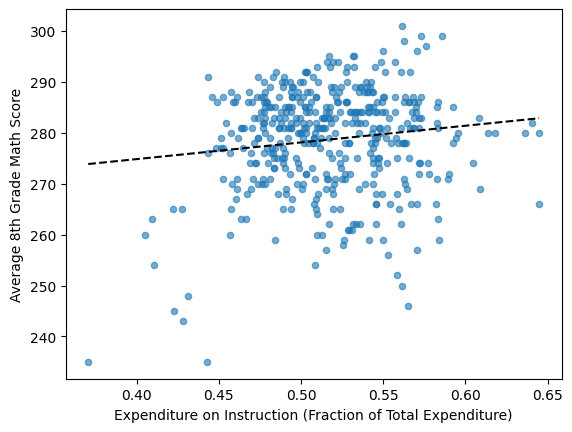

In [9]:
plot_x = "INSTRUCTION_EXPENDITURE_FRACTION"
plot_y = "AVG_MATH_8_SCORE"

df.dropna(subset=[plot_x], inplace=True)

ax = df.plot.scatter(x = plot_x, y = plot_y, alpha=0.6,
    xlabel="Expenditure on Instruction (Fraction of Total Expenditure)",
    ylabel="Average 8th Grade Math Score")

b, a = np.polyfit(df[plot_x].tolist(), df[plot_y].tolist(), deg=1)
xseq = np.linspace(df[plot_x].min(), df[plot_x].max(), 100)
ax.plot(xseq, a + b * xseq, '--k')


This plot shows 8th grade math scores versus the fraction of total expenditure spent on instruction. If there is any correlation here, it is very weak.

**Visualization 2**

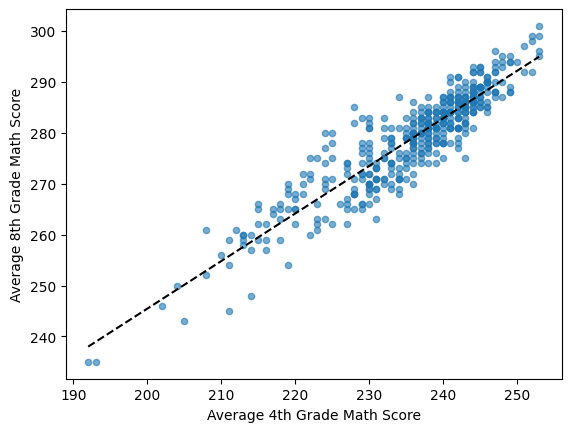

In [10]:
plot_x = "AVG_MATH_4_SCORE"
plot_y = "AVG_MATH_8_SCORE"

df.dropna(subset=[plot_x], inplace=True)

ax = df.plot.scatter(x = plot_x, y = plot_y, alpha=0.6,
    xlabel="Average 4th Grade Math Score",
    ylabel="Average 8th Grade Math Score")

b, a = np.polyfit(df[plot_x].tolist(), df[plot_y].tolist(), deg=1)
xseq = np.linspace(df[plot_x].min(), df[plot_x].max(), 100)
ax.plot(xseq, a + b * xseq, '--k')


This plot shows 8th grade versus 4th grade math scores, and it shows a strong correlation.

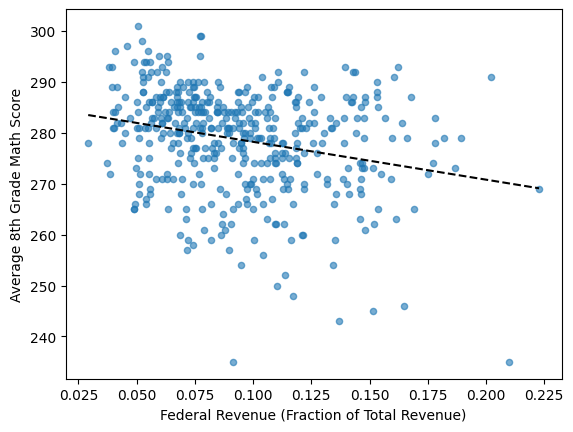

In [11]:
plot_x = "REVENUE_SOURCE_RATIO"
plot_y = "AVG_MATH_8_SCORE"

df.dropna(subset=[plot_x], inplace=True)

ax = df.plot.scatter(x = plot_x, y = plot_y, alpha = 0.6,
    xlabel="Federal Revenue (Fraction of Total Revenue)",
    ylabel="Average 8th Grade Math Score"
    )

b, a = np.polyfit(df[plot_x].tolist(), df[plot_y].tolist(), deg=1)
xseq = np.linspace(df[plot_x].min(), df[plot_x].max(), 100)
ax.plot(xseq, a + b * xseq, '--k')


This plot shows 8th grage math scores versus federal revenue as a fraction of total revenue. If it shows any correlation, it is very weakly negatively correlated.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df[['ENROLL_8', 'AVG_MATH_4_SCORE', 'AVG_READING_8_SCORE', 'REVENUE_SOURCE_RATIO']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']
y.fillna(y.mean(), inplace=True)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [15]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [16]:
# create your model here
model = LinearRegression()

In [17]:
model.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [19]:
model_r2 = model.score(X_test, y_test) #R^2 value
model_mean_err = np.mean(model.predict(X_test)-y_test) #mean error
model_abs_err = np.mean(np.abs(model.predict(X_test)-y_test)) #absolute error
model_rms_err = np.mean((model.predict(X_test)-y_test)**2)**0.5 #root-mean-square error

print(model_r2)
print(model_mean_err)
print(model_abs_err)
print(model_rms_err)

0.8878147947285988
-0.1543198690772019
2.1146656903369228
2.7164359363416417


The R^2 value is pretty high, indicating a good fit for the model. The different error measures all seem reasonable given the exploratory data analysis I did for this data set.

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

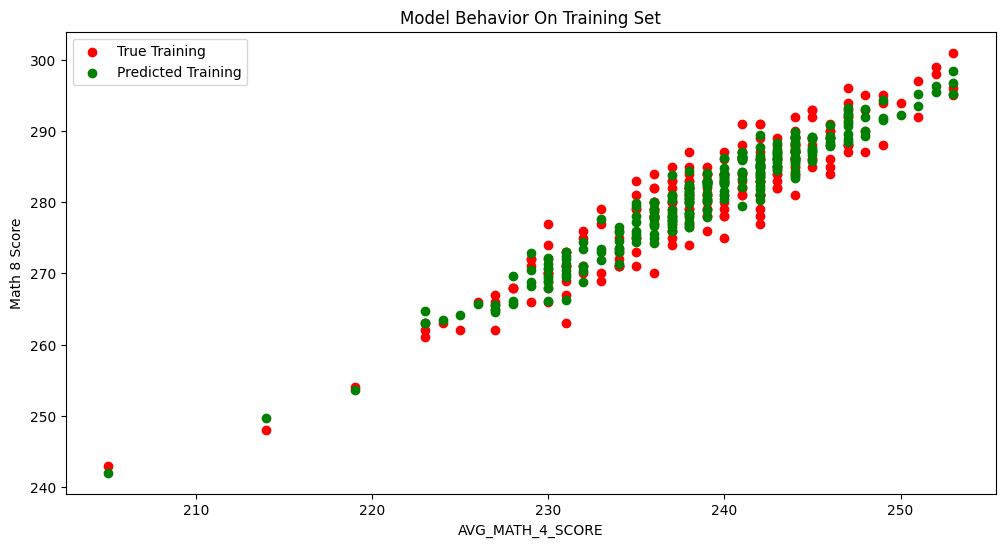

In [20]:
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
col_name = 'AVG_MATH_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Math 8 Score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

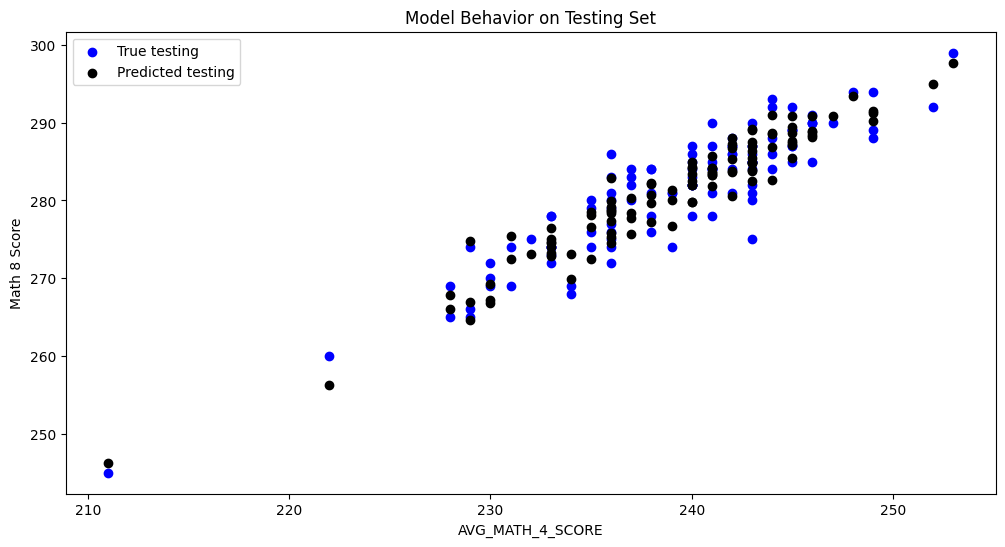

In [21]:
col_name = 'AVG_MATH_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 8 Score')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\>**